In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [5]:
customers = pd.read_csv('data/Customers.csv')
products = pd.read_csv('data/Products.csv')
transactions = pd.read_csv('data/Transactions.csv')

In [7]:
customers.head(3)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07


In [9]:
products.head(3)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12


In [11]:
transactions.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68


## Missing Value Analysis
* ### No missing values in any of the tables 

In [305]:
products.isna().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [307]:
transactions.isna().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [309]:
customers.isna().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

## Data Analysis

### Customer Data
* #### There are four regions from where the customers belong
* #### South America has highest number of customers followed by Europe, North America and Asia

In [23]:
no_of_customers = len(customers['CustomerID'].unique())
regions = customers['Region'].unique()
no_of_regions = len(regions)
print(f"There are total {no_of_customers} customers spread across {no_of_regions} regions")
print(f"Regions are {regions}")

There are total 200 customers spread across 4 regions
Regions are ['South America' 'Asia' 'North America' 'Europe']


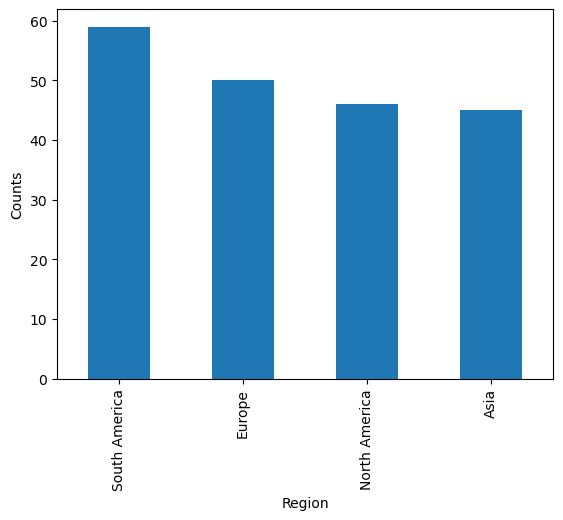

In [313]:
customers.groupby(['Region']).aggregate('count')['CustomerID'].sort_values(ascending=False).plot(kind='bar')
plt.savefig('plots/customer_1.jpg')
plt.ylabel('Counts')
plt.show()

### Product Data
* #### There are four categories of products listed
* #### 'Books' has highest number of product litings followed by 'Electronics', 'Clothing' and 'Home Decor'
* #### There is not much variation in average price of products in each category 

In [55]:
no_of_products = len(products['ProductID'].unique())
prod_categories = products['Category'].unique()
print(f"There are {no_of_products} unique products belonging to following categories")
print(prod_categories)

There are 100 unique products belonging to following categories
['Books' 'Electronics' 'Home Decor' 'Clothing']


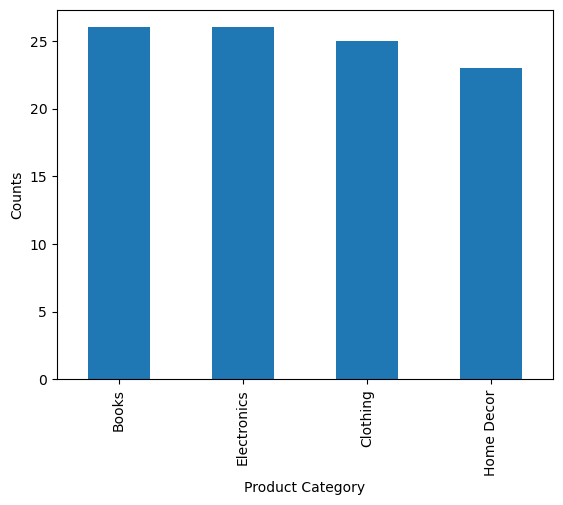

In [316]:
products.groupby(['Category']).aggregate('count')['ProductID'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Counts')
plt.savefig('plots/products_1.jpg')
plt.show()


Categorywise mean
Category
Books          292.212308
Clothing       263.720000
Electronics    275.353462
Home Decor     235.020000
Name: Price, dtype: float64

Categorywise median
Category
Books          337.94
Clothing       303.50
Electronics    282.72
Home Decor     235.58
Name: Price, dtype: float64


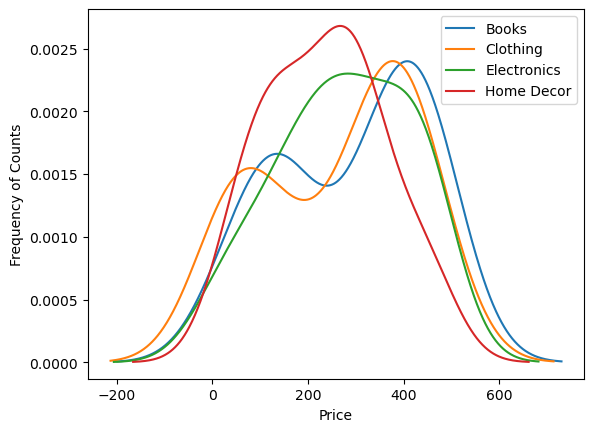

In [112]:
for stat in ['mean', 'median']:
    print(f"\nCategorywise {stat}")
    print(products.groupby(['Category'])['Price'].aggregate(stat))
products.groupby(['Category'])['Price'].plot(kind='kde')
plt.xlabel('Price')
plt.ylabel('Frequency of Counts')
plt.legend()
plt.savefig('plots/products_2.jpg')

### Purchase Data
* #### Categorywise 'Books' have generated highest revenue followed by 'Electronics', 'Clothing' and 'Home Decor'. This is not surprising as categorywise product listings also follow the same pattern.
* #### Regionwise 'South America' topped the list followed by 'Europe', 'North America' and 'Asia'. This also follows the same pattern of regionwise customer distribution.
* ####  In South America 'Books' have generated the most revenue, but Clothing and Home Decor require attention.
* #### In North America revenue of Home Decor lower than the other categories.
* #### In Asia revenue from Clothing is the highest as compared to other regions, so Clothing related products need attention in other regions.
* #### Customer 'C0141' has spent the highest among all customers (over Rs. 10,000) where customer 'C0060' spent the least
* #### Inventory of top selling products listed below require attention to avoid out of stock, where lowest selling products require promotion.


In [163]:
merged_data = pd.merge(transactions, customers, 'left', on='CustomerID')
merged_data = pd.merge(merged_data, products, 'left', on='ProductID')
merged_data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [165]:
merged_data['Price'] = merged_data['Price_x']
merged_data.drop(columns=['Price_x', 'Price_y'], inplace=True)

In [333]:
print("Top 10 customers by spending")
spending_sorted = merged_data.groupby(['CustomerID'])['TotalValue'].aggregate('sum').sort_values(ascending=False)
print(spending_sorted[0:10])
print("\nBottom 10 customers by spending")
print(spending_sorted[-1:-10:-1])

Top 10 customers by spending
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64

Bottom 10 customers by spending
CustomerID
C0060     82.36
C0033    132.64
C0097    137.54
C0151    223.96
C0014    318.66
C0058    396.34
C0150    580.34
C0130    601.36
C0083    642.80
Name: TotalValue, dtype: float64


In [265]:
print('Top selling products - Quantity Wise')
print(merged_data.groupby(['ProductID', 'ProductName', 'Category'])['Quantity'].sum().sort_values(ascending=False)[0:10])
print('\nTop selling products - Revenue Wise')
merged_data.groupby(['ProductID', 'ProductName', 'Category'])['TotalValue'].sum().sort_values(ascending=False)[0:10]

Top selling products - Quantity Wise
ProductID  ProductName            Category   
P059       SoundWave Jeans        Clothing       46
P054       SoundWave Cookbook     Books          46
P029       TechPro Headphones     Electronics    45
P079       ActiveWear Rug         Home Decor     43
P061       HomeSense Desk Lamp    Home Decor     43
P057       ActiveWear Smartphone  Electronics    43
P048       TechPro Cookbook       Books          43
P062       HomeSense Novel        Books          39
P020       ActiveWear Jacket      Clothing       38
P028       HomeSense Desk Lamp    Home Decor     38
Name: Quantity, dtype: int64

Top selling products - Revenue Wise


ProductID  ProductName               Category   
P029       TechPro Headphones        Electronics    19513.80
P079       ActiveWear Rug            Home Decor     17946.91
P048       TechPro Cookbook          Books          17905.20
P020       ActiveWear Jacket         Clothing       15060.92
P062       HomeSense Novel           Books          14592.24
P059       SoundWave Jeans           Clothing       13947.20
P039       TechPro Smartwatch        Electronics    13778.88
P083       ActiveWear Smartwatch     Electronics    13671.60
P019       ComfortLiving Sweater     Clothing       13487.95
P041       ComfortLiving Smartphone  Electronics    13232.12
Name: TotalValue, dtype: float64

In [346]:
print("Lowest Selling Products")
print(merged_data.groupby(['ProductID', 'ProductName', 'Category'])['Quantity'].sum().sort_values(ascending=False)[-1:-10:-1])

Lowest Selling Products
ProductID  ProductName               Category   
P031       SoundWave Headphones      Electronics     9
P099       SoundWave Mystery Book    Books          11
P024       SoundWave Cookbook        Books          12
P060       HomeSense T-Shirt         Clothing       13
P044       ActiveWear Running Shoes  Clothing       13
P014       ActiveWear Jacket         Clothing       14
P090       ComfortLiving Biography   Books          14
P070       HomeSense T-Shirt         Clothing       15
P037       SoundWave Smartwatch      Electronics    15
Name: Quantity, dtype: int64


In [298]:
print('Categorywise Top Revenue Generating Products')
for category in merged_data['Category'].unique():
    print(f"\nTop selling prooducts in {category}")
    cat_products = merged_data[merged_data['Category']==category]
    print(cat_products.groupby(['ProductID', 'ProductName'])['TotalValue'].sum().sort_values(ascending=False)[0:5])

Categorywise Top Revenue Generating Products

Top selling prooducts in Electronics
ProductID  ProductName             
P029       TechPro Headphones          19513.80
P039       TechPro Smartwatch          13778.88
P083       ActiveWear Smartwatch       13671.60
P041       ComfortLiving Smartphone    13232.12
P050       ActiveWear Smartwatch       12254.20
Name: TotalValue, dtype: float64

Top selling prooducts in Clothing
ProductID  ProductName          
P020       ActiveWear Jacket        15060.92
P059       SoundWave Jeans          13947.20
P019       ComfortLiving Sweater    13487.95
P076       ActiveWear Jeans         11161.54
P065       BookWorld Sweater        10690.25
Name: TotalValue, dtype: float64

Top selling prooducts in Books
ProductID  ProductName        
P048       TechPro Cookbook       17905.20
P062       HomeSense Novel        14592.24
P075       TechPro Textbook       12941.76
P086       SoundWave Novel        12780.30
P017       ActiveWear Textbook    12214.02
Name

Top selling categories
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


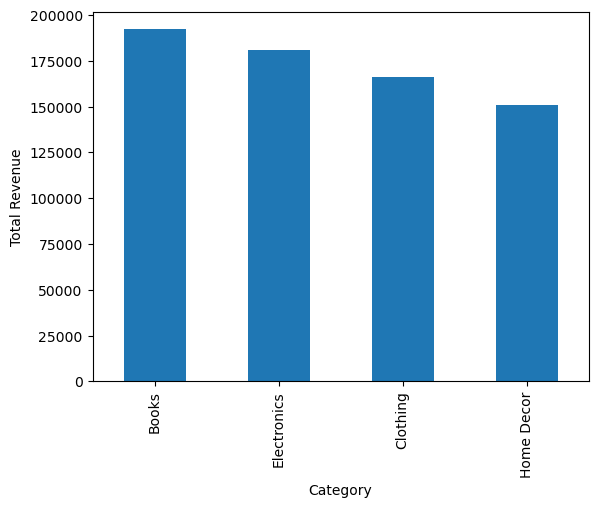

In [211]:
print("Top selling categories")
category_speding = merged_data.groupby(['Category'])['TotalValue'].aggregate('sum').sort_values(ascending=False)
print(category_speding)
category_speding.plot(kind='bar')
plt.ylabel('Total Revenue')
plt.savefig('plots/transactions_1.jpg')
plt.show()

Regionwise Revenue
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


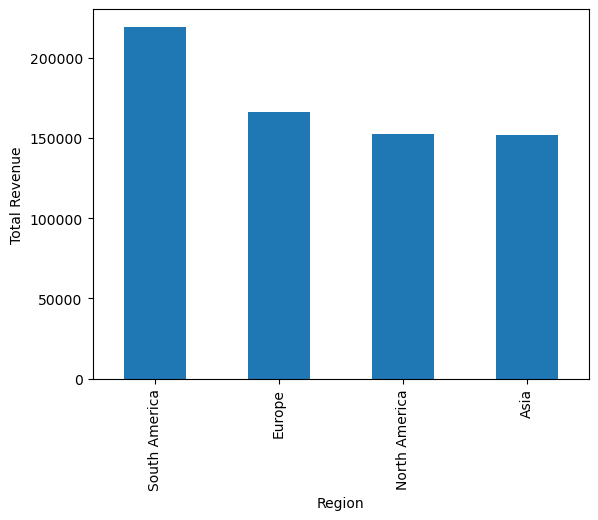

In [221]:
print('Regionwise Revenue')
regionwise_spending = merged_data.groupby(['Region'])['TotalValue'].aggregate('sum').sort_values(ascending=False)
print(regionwise_spending)
regionwise_spending.plot(kind='bar')
plt.ylabel('Total Revenue')
plt.savefig('plots/transactions_2.jpg')
plt.show()

Region         Category   
Asia           Books          33119.03
               Clothing       49353.09
               Electronics    35658.15
               Home Decor     33944.70
Europe         Books          47464.42
               Clothing       36335.59
               Electronics    41562.60
               Home Decor     40892.02
North America  Books          41811.99
               Clothing       38038.49
               Electronics    44716.43
               Home Decor     27746.49
South America  Books          69752.03
               Clothing       42443.49
               Electronics    58846.32
               Home Decor     48310.72
Name: TotalValue, dtype: float64


<Axes: xlabel='Region', ylabel='TotalValue'>

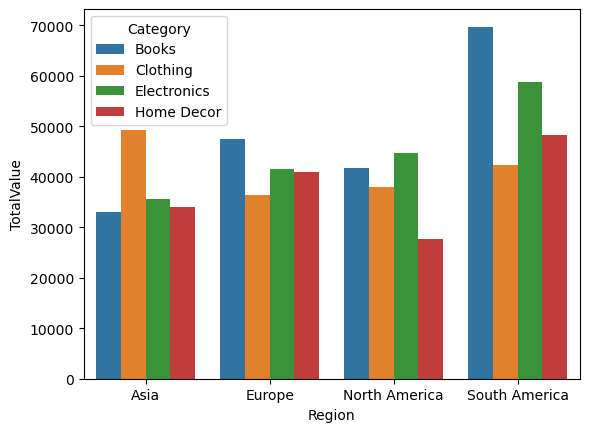

In [245]:
region_cat_df = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum()
print(region_cat_df)
sns.barplot(data=region_cat_df.reset_index(), x='Region', y='TotalValue', hue='Category')